<h1>Tecnologias para o Ecosistema de Big Data</h1>

<h2>Introdução a Big Data</h2>

- Volume, Velocidade e Variedade + Visualizacao, Veracidade e Valor


<h2>Arquitetura Distribuída para Big Data e Principais Frameworks</h2>

- Podem ter foco em armazenamento ou processamento
- Armazenamento: Neo4J, Cassandra e Hadoop HDS
- Processamento: Spark, Cloudera e Hadoop Map Reduce


<h2>Introdução a Banco de Dados e SQL</h2>

- SGBD: conjunto de programas que permitem acesso/manipular banco de dados
- escalabilidade, schema flexivel, consultas e agregacoes, tolerancia a falhas
- SQL: baseado em algebra relacional para modelagem e consulta de dados


<h2>SQL: Tabelas e Tabelas Temporárias</h2>

- CHAR: aloca todo espaco definido 
- VARCHAR: nao aloca todo espaco, mas texto tem tamanho variavel. Quando nao se sabe tamanho de dados que sera utilizado
- INT: inteiros
- NUMERIC: numericos e decimais (s: escala, p: precisao)

- Tabelas: estruturas que representam conceitos, linhas sao instancias representadas
- Tabelas temporarias: dura somente sessao do usuario com banco de dados

In [ ]:
# criar tabela
CREATE TABLE PESSOAS (
    ID INT NOT NULL,
    NOME VARCHAR(10) NOT NULL,
    IDADE INT NOT NULL,
    FILHOS INT
)
VALUES (1, "PAULA", 20, NULL);


# criar tabela temporaria
CREATE TEMPORARY TABLE PESSOAS (
    ID INT NOT NULL,
    NOME VARCHAR(10) NOT NULL,
    IDADE INT NOT NULL,
    FILHOS INT
)
VALUES (1, "PAULA", 20, NULL);


# inserir dados na tabela
# se um atributo not null nao seja definido, vai dar erro
INSERT INTO PESSOAS(ID, NOME, IDADE, FILHOS)
VALUES(2, "EVELING", 28, 0);


# selecionar dados da tabela
SELECT * FROM PESSOAS;
SELECT ID, NOME, IDADE, FILHOS FROM PESSOAS;
SELECT ID, NOME FROM PESSOAS;


# reduzir numero de linhas que sao retornados

# HIVE, Presto, Impala
SELECT ID, NOME FROM PESSOAS LIMIT 3;

# Oracle
SELECT ID, NOME FROM PESSOAS WHERE ROWNUM <= 3;

# SQL Server
SELECT TOP 3 ID, NOME FROM PESSOAS;


# filtros where
SELECT * FROM PESSOAS WHERE NOME = 'PAULA';
SELECT * FROM PESSOAS WHERE IDADE >= 20;
SELECT * FROM PESSOAS WHERE FILHOS <> 0; # diferente de 0 ou igual a null


# filtros avancados:  all, and, any, between, exists, in, likem not, or, some, is null
SELECT * FROM PESSOAS WHERE IDADE BETWEEN 20 AND 23;
SELECT * FROM PESSOAS WHERE IDADE IN(20,23);
SELECT * FROM PESSOAS WHERE IDADE IN(20,23) AND FILHOS = 0; # duas condicoes precisam ser verdadeiras
SELECT * FROM PESSOAS WHERE IDADE IN(20,23) OR FILHOS = 0; # se qualquer condicao for verdadeira
SELECT * FROM PESSOAS WHERE IDADE IN(20,23) OR (FILHOS = 0 AND IDADE < 25);


# Wildcards: % (zero, um ou multiplos caracteres) ou _ (unico caracter)
# nao buscam valores nulos
# alto custo computacional, devem ser utilizado em ultimo caso
SELECT * FROM PESSOAS WHERE NOME LIKE "P%";
SELECT * FROM PESSOAS WHERE NOME LIKE "%ULA";
SELECT * FROM PESSOAS WHERE NOME LIKE "_A%"; # segunda letra eh A


# ordenacao ASC ou DESC
# sempre ultima instrucao do comando
SELECT * FROM PESSOAS ORDER BY NOME ASC;
SELECT * FROM PESSOAS ORDER BY FILHOS ASC, IDADE DESC;
SELECT * FROM PESSOAS ORDER BY FILHOS DESC;
SELECT ID, NOME FROM PESSOAS ORDER BY IDADE DESC;
SELECT ID, NOME FROM PESSOAS ORDER BY IDADE 2, 1; # ordenar pela posicao da coluna


# operacoes matematicas
SELECT 15 + 10 - 5 * 5 / 5 AS CALCULO;
SELECT ID, NOME, IDADE + 1 AS IDADE, FILHOS FROM PESSOAS;
SELECT *, IDADE / FILHOS AS MEDIA_FILHOS FROM PESSOAS WHERE FILHOS > 0;


# funcoes de agregacao: min, max, sum, avg, count
SELECT COUNT(*) AS CONTAGEM FROM PESSOAS; # ignora nulls
SELECT COUNT(DISTINCT FILHOS) AS CONTAGEM FROM PESSOAS;
SELECT AVG(FILHOS) AS MEDIA_FILHOS FROM PESSOAS;


# agrupamento de dados
SELECT FILHOS, AVG(IDADE) AS MEDIA_IDADE FROM PESSOAS GROUP BY FILHOS;
SELECT FILHOS, COUNT(*) AS CONTAGEM FROM PESSOAS GROUP BY FILHOS;
SELECT FILHOS, COUNT(*) AS CONTAGEM FROM PESSOAS GROUP BY FILHOS HAVING COUNT(*) > 1;


# combinando clausulas
# legibilidade, desempenho, tempo de resposta, corretude
SELECT AVG(IDADE/FILHOS) AS MEDIA FROM PESSOAS WHERE NOME IN ("ELIANA", "RAQUEL", "MARTA") AND FILHOS > 0;


# comentario de codigo
# em linha: --
# em bloco: /* (inicio) */ (final)








<h2>Modelo de Dados SQL</h2>


- ACID: 
    - Atomacidade: toda operacao eh realizada ou nada
    - Consistencia
    - Isolamento: transacao executada de forma isolada
    - Durabilidade


<h2>Modelo de Dados NoSQL</h2>

- Reduzir carga imposta pela normalizacao
- otimizar desempenho
- baseado no teorema CAP (consistency, availability, partition tolerance)
- chave-valor: acesso rapido a registros; redis
- colunar: dados armazenados em colunas; cassandra
- grafos: nos e arestas; otimiza operacoes de busca em grafos; neo4j
- documentos: cada linha em formato livre; mongodb (json)


In [ ]:
# Subqueries: subconsultas
# nao ha limites
# interferem no desempenho/tempo de resposta

# numero de compras por pessoas
SELECT ID, NOME,
    (SELECT COUNT(*)
    FROM COMPRAS
    WHERE COMPRAS ID_PESSOA = PESSOAS.ID) AS TOTAL_COMPRAS
FROM PESSOAS;

# seleciona pessoas que compraram
SELECT ID, NOME
FROM PESSOAS
WHERE ID IN (SELECT DISTINCT ID_PESSOA FROM COMPRAS);



# Union
# combina linhas dos resultados de duas ou mais consultas
# resultados: mesmo numero de colunas, organizadas na mesma ordem
# faz distinct automatico

SELECT ID_PESSOA FROM COMPRAS UNION SELECT ID FROM PESSOAS;



# Join
# combina linhas de duas ou mais tabelas 
# relacao baseada nas colunas
# alto custo computacional 

SELECT T2.NOME, T1.DATA_COMPRA, T1.VALOR
FROM COMPRAS AS T1
LEFT JOIN PESSOAS AS T2
ON T2.ID = T1.ID_PESSOA;

# self join
# nome das pessoas que tem a mesma quantidade de filhos
SELECT P1.NOME, P2.NOME
FROM PESSOAS AS P1, PESSOAS AS P2
WHERE P1.ID <> P2.ID AND P1.FILHOS = P2.FILHOS


<h2>Introdução a Organização de Dados</h2>

- evitar custos desnecessarios
- reduzir tempo de processamento
- desafios: maior custo de armazenamento, pode ser necessario manter replica de dados, alto custo de pre-processamento
- vantagens: facil interpretacao, mantem ordem de geracao (de logs por exemplo), leitura de forma linear/sequencial
- desvantagens: dificulta compressao



<h2>Hierarquia de Pastas</h2>

- Principais softwares para processamento de dados: Hive, Presto
- cada arquivo e considerado parte da tabela
- cada pasta e considerada como arquivos
- formato dos arquivos devem ser iguais
- quanto mais arquivos, mais tempo se leva para ler arquivos



<h2>Arquivos Orientados por Linha</h2>

- cada linha representa um registro
- CSV: colunas sao normalmente separadas por caracter especial
- JSON: formato leve para troca de dados
- Vantagens:
    - processamento simples
    - facil insercao de dados
- Desvantagens:
    - agregacoes podem ser custosas
    - dificil compressao
    - operacoes colunares exigem leitura de dados desnecessarios



<h2>Arquivos Orientados por Coluna</h2>

- RCFile (Recor Columnar File)
- valores de cada coluna sao armazenados de forma sequencial
- quebra de linha define separacao de colunas
- colunas textuais sao limitadas por ""
- Vantagens:
    - compressao mais eficiente
    - dados do mesmo tipo sao armazenados de forma sequencial
    - mais rapido para fazer agregacoes ou operacoes colunares
- Desvantagens:
    - pouco eficiente para inserir/editar dados
    - pouco eficiente para buscar varias colunas



<h2>Compressão de Arquivos</h2>

- tecnicas para reduzir tamanho do arquivo original
- lossless compression ou lossy compression
- GZIP: dados acessados com menor frequencia, usa mais recurso CPU
- Recomendacoes:
    - capacidade de compressao e descompressao
    - leitura e escrita em disco
    - trafego de rede
    - nao comprimir dados que ja estao comprimidos, eg. jpeg
- vantagens:
    - reduzir tamanho dos arquivos
    - economiza espaco de armazenamento
    - aumenta velocidade de transferencia de dados
- desvantagens:
    - aumenta custo de processamento
    - alguns formatos nao permitem leitura sem que todo arquivo seja processado



<h2>Apache Avro, Orc e Parquet</h2>

- formatos binarios legiveis por maquina somente, nao sendo amigaveis para humanos
- Apache Avro:
    - orientado por linha
    - foco na escrita
    - estrutura de dados rica, compacta e rapida
    - simples integracao
    - tipagem dinamica (dado acompanhado pelo schema)
    - evita criacao de tags para valores
    - mudancas sao facilmente tratadas

- Apache Parquet e Orc
    - orientado por colunas
    - foco na leitura
    - aumentsr performance de escrita e leitura
    - rapido acesso e facil compressao
    - legibilidade de esquema
    - parquet:
        - descrito no paper da Google sobre o modeloDremel
        - cada arquivo de dado contem valores para conjunto de linhas
        - eficiente leitura e escrita
    - orc:
        - introduz indexacao que permite pular blocos de linhas irrelevantes
        - estatisticas basicas sobre colunas


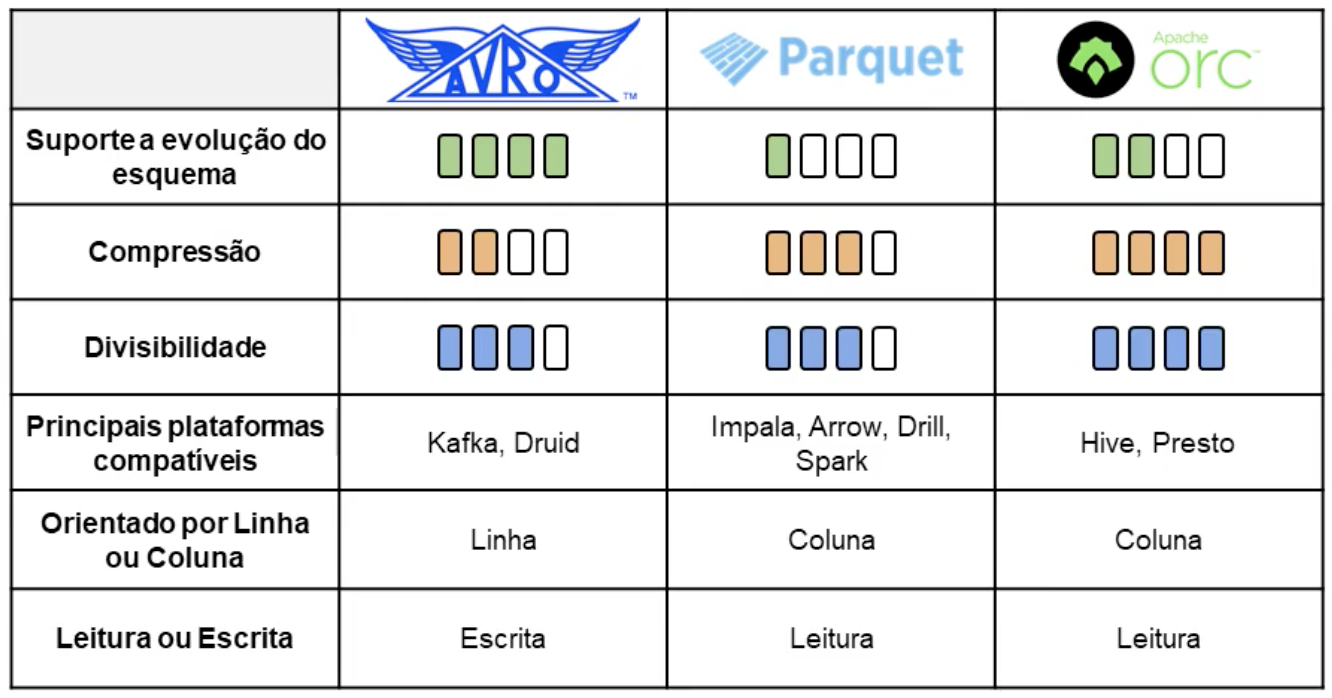

<h2>Armazenamento Distribuído</h2>

- manter dados em varias maquinas
- distribui carga de trabalho
- volume de dados que nao podem ser processados em uma unica maquina
- relacionado a escalabilidade
- crescimento horizontal
- realizar multiplas consultas de forma independente
- alocar recursos de forma mais especifica
- vantagens:
    - indices e dados separados
    - escalar armazenamento
    - inviavel aumentar capacidade de forma vertical
- desvantagens:
    - limitacoes de consulta (consultas joins muito lenta)
    - overhead nas queries distribuidas
    - two-phase-commit para cada transacao
- conceitos relacionados a BD NoSQL
- possivel criar ambientes de armazenamento/processamento separadamente

<h2>Armazenamento Distribuído usando HDFS</h2>

- HDFS: parte do Hadoop para armazenamento distribuido de dados
- depende de estrutura especifica:
    - name node: armazena metadados
    - data nodes: armazenamento de dados


In [ ]:
# ler arquivos csv em python
import pandas as pd

df = pd.read_csv('/home...csv', delimiter = '\t') # delimitador e tab neste caso 
df.head() # mostra parte da base de dados

# remove valores null as NaN
df = pd.read_csv('/home...csv', delimiter = '\t', na_values = '\\n', low_memory = False)
df.head()

df.to_csv('/home...csv', index = False)

In [ ]:
# compressao com python utilizando gzip

import gzip

wgz = gzip.open('/home...csv.gz', 'wb')
rf = open('/home...csv', 'r')

for l in rf.readlines():
    # converte dados para bytes / tem que ser binario
    wgz.write(bytes(l, 'utf-8'))
    

wgz.close
rf.close

wgz = gzip.open('/home...csv.gz', 'wb')
rf = open('/home...csv', 'r')

%timeit for l in rf.readlines: wgz.write(bytes(l, 'utf-8'))
    
wgz.close
rf.close



# leitura de arquivos utilizando gzip

import gzip

rf = gzip.open('/home...csv.gz', 'r') # read - abrir em formato leitura
rf = readline

rf.close



# utilizando snappy

import snappy

def snappy_compress(path):
    outfile = path + '.snappy'
    with open(path, 'rb') as rf: # rb: leitura binaria
        with open(outfile, 'wb') as wsn: # wb: escrita binaria
            snappy.stream_compress(rf, wsn)
            wsn.close()
            rf.close()
            
snappy_compress('/home...csv')


def snappy_decompress(path):
    outfile = path + 'csv'
    with open(path, 'rb') as rf: # rb: leitura binaria
        with open(outfile, 'wb') as wsn: # wb: escrita binaria
            snappy.stream_decompress(rf, wsn)
            wsn.close()
            rf.close()
            
snappy_decompress('/home...csv.snappy')



In [ ]:
# Arquivos Avro com Python
# tem que passar schema do arquivo
# formato de serializacao de dados
# pode ser armazenado e lido sem ser gerado codigo de leitura
# schema esta acompanhando codigo de leitura

import numpy as np
import pandas as pd

def __type_infer(t: no.dtype):
    if t == np.bool_:
        return 'boolean'
    elif t == (np.int8 or np.int16 or np.int32):
        return 'int'
    elif t == np.int64:
        return 'long'
    elif t == np.float32:
        return 'float'
    elif t == np.float64:
        return 'double'
    elif t == np.object:
        return 'string'
    else
        raise TypeError('Invalid type: {}'.format(t))

        
def __fields_infer(df: pd.DataFrame):
    fields = []
    for key, type_np in df.dtypes.iteritems():
        type_avro = __type_infer(type_np)
        fields.append({'name': key, 'type': [null, type_avro]})
    return fields


# recebe campos, depois schema
def __schema_infer(df: pd.DataFrame, table_name: str):
    fields = __fields_infer(df)
    schema = {
        'type' : 'record',
        'name' : table_name,
        'fields' : fields
    }
    return schema


import avro.schema
import json

df = pd.read_csv('/home...csv')
schema = avro.schema.Parse(json.dumps(__schema_infer(df, 'Traffic')))

from avro.datafile import DataFileReader, DataFileWriter
from avro.io import DatumReader, DatumWriter

writer = DataFileWriter(open('/home...avro', 'wb'),DatumWriter(), schema)

for i, r in df.iterrows():
    writer.append(r.to_dict())
    

reader = DataFileReader(open('/home....avro', 'rb'), DatumReader())

for traffic in reader:
    print(traffic)
    break
    

reader.close

ws = open('/home....avsc', 'w')
ws.write(json.dumps(schema.to_json()))

ws.close

# visualizar tamanho do arquivo
%sx ls - lh


# ler schema direto do arquivo
schema = avro.schema.Parse(open('/home...csv.avsc', 'r').read())
schema

schema.to_json()

In [ ]:
# Arquivos Parquet com Python

import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

df = pd.read_csv('/home....csv')

table = pa.table.from_pandas(df)

# escrever arquivo
pq.write_table(table, '/home...csv.parquet')

# visualizar arquivo
%sx ls - lh

# ler tabela
table_pq = pq.read_table('/home...csv.parquet')

# converter para pandas e visualizar arquivo original
df = table_pq.to_pandas()
df.head()

# alterar formato padrao para gzip
pq.write_table(table, '/home...csv.parquet.gzip', compression = 'gzip')

# visualizar tamanho do arquivo
%sx ls - lh

# leitura de arquivo em gzip
table_pq = pq.read_table('/home...csv.parquet.gzip')
df = table_pq.to_pandas()
df.head()




In [ ]:
# Arquivos Orc com Python
# spark sempre le diretorios

from pyspark.sql import SparkSession

# criar sessao com spark
spark = SparkSession.builder.appNmae('write-orc').getOrCreate()

# ler csv direto do spark
df = spark.read.csv('/home...csv', header = True)
df.show(1) # data frame do spark

# nao permite caracter especial
# estes devem ser substituidos
for c in df.columns:
    df = df.withColumnRenamed(cm c.replace('.','_'))
    

# gerar somente uma arquivo spark (distribuido)
df.coalesce(1)

df.coalesce(1).write.orc('/home...csv.orc')

# formato padrao de compressao: snappy
df.coalesce(1).write.orc('/home...csv.orc.zlib', compression = 'zlib')

# mostrar tamanho dos arquivos
%sx ls - lh begin_traffic.csv.orc*/

# leitura do arquivo
df_orc = spark.read.orc('/home...csv.orc/')

# converter para pandas
df_pandas = df_orc.toPandas()
df_pandas.head()

# abrir arquivo usando o pyarrow
from pyarrow import orc

orc_reader = orc.ORCFile('/home...csv.orc')

# ver arquivo
for r in orc_reader.reader.read():
    print(r)
    break

    
# arquivo parquet utilizando spark para comparar tamanhos
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('write-orc').getOrCreate()
df = spark.read.csv('/home...csv', header = True)

for c in df.columns:
    df - df.withColumnRenamed(c, c.replace('.', '_'))

    
df.coalesce(1).write.parquet('/home...csv.parquet')
df.coalesce(1).write.parquet('/home...csv.parquet.spark.gzip', compression = 'gzip')

# visualizar pasta
%sx ls -lh bengin_traffic.csv.parquet.

In [ ]:
# trabalho

import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq

df = pd.read_csv('/home...tsv', delimiter = '\t', na_values='\\N', low_memory = False)

table = pa.Table.from_pandas(df)

# tempo de escrita
%timeit pq.write_table(table, '/home...basics.parquet')

%sx ls -l

%sx ls lh

# leitura do arquivo
%timeit table_pq = pq,read_table('/home...basics.parquet')



<h2>Apache Hive</h2>

- implementacao de maquina SQL para rodar buscas em ambiente hadoop
- HiveQL > Hive > Hadoop MapReduce > Hadoop HDFS
- Map reduce: modelo de programacao para processamento de grande volume de dados
    - map: gerar zero ou mais tuplas chave/valor do dataset
    - sort: economiza tempo da funcao reduce; facilita distincao quando dados devem ser separados ou tratados em conjunto
    - shuffle: transferir/transportar dados de map para reduce
    - reduce: recebe valores agrupados e gera o resultado de fato

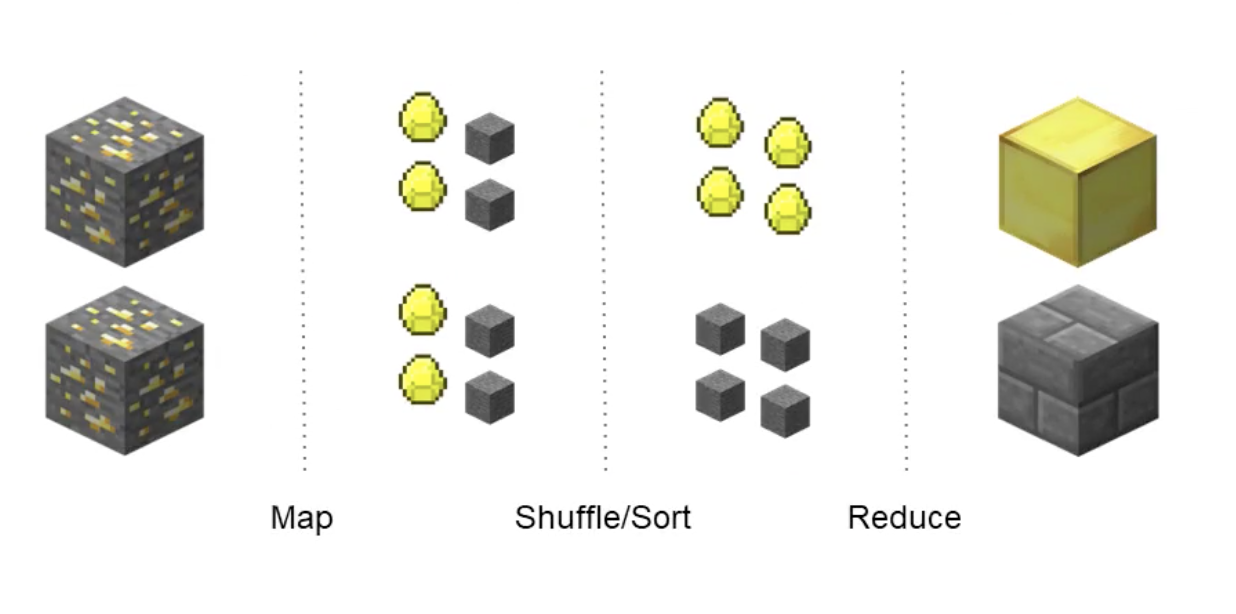

- Etapas:
    - divisao de dados
    - organizar conjunto de dados
    - distribuir organizacao para um unico recurso
    - condensar dados em unica linha para operar dados mais facil
- vantagens:
    - tolerante a falhas
    - varias asbtracoes construidas (PIG, Hive, etc)
    - valor historico (modelo de computacao)
- desvantagens:
    - grande overhead de execucao
    - varias etapas intermediarias sao escritas em disco



<h2>Apache Pig</h2>

- plataforma para analisar grandes conjuntos de dados
- abstracao sobre o modelo map reduce
- possui propria linguagem de alto nivel: Pig Latin
- escrita leitura e processamento de dados
- Pig Latin > Hadoop Map Reduce > Hadoop HDFS
- responsavel por analisar, compilar, otimizar e planejar acoes pig

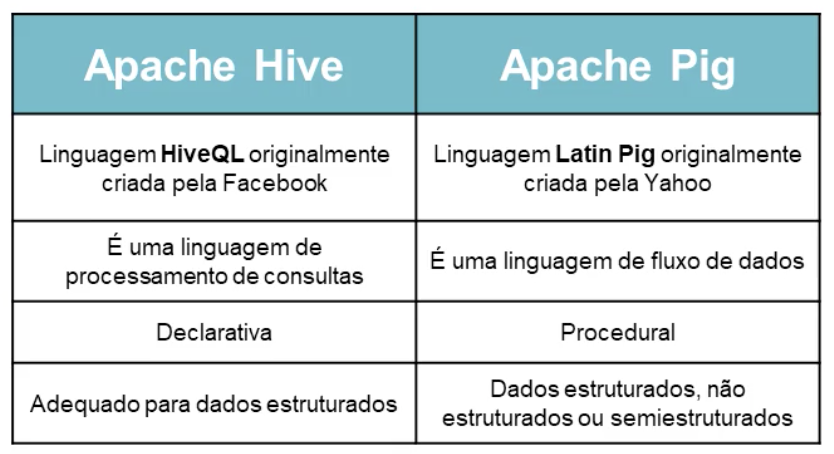

- Separado em items: Atom, Bag, Tupla e Map
    - bag: conjunto de dados
    - tupla: linha dos dados
    - field: determinado campo da bag/tupla
    - atom: campo/celula especifico
    - map: estrutura que possui chave e valor
- executar local: pig -x local
- executar MapReduce: pig -x mapreduce (executado em cima do hadoop)



<h2>Dremel e Apache Drill</h2>

- dremel: engine para execucao de consultas SQL-like
- objetivo e permitir consultas interativas em grande volume de dados
- servidor raiz > servidor intermediario > servidor folha
- processamento de dados diretamente em disco
- gargalo normalment e IO
- esforco da consulta depende do consumo de mb processados<br><br>

- drill: implementa recursos criados pelo dremel open source
- capaz de processar petabytes de dados
- uma unica consulta pode processar dados de varios sistemas-  MongoDB, dados armazenados no HDFS
- schema-free: esquema nao e fixo
- drillbit: processo em execucao de cada no do cluster
- cada no planejam em executam consultas
- transforma operadores SQL em sintaxe especifica do drill
- foreman: envia plano logico para otimizador basedo em custo

<h2>Apache Impala e Presto DB</h2>

- impala: cloudera engine SQL para processamento massivo e paralelo de dados
- linguagem C++
- baseado em NewSQL
- nao transforma jobs em MapReduce sendo mais eficiente
- integra cluster hadoop e le dados HDFS como o parquet
- funcionamento:
- eleva desempenho das consultas
- consultar dados em tempo real
- usa mesmos metadados que hive
- drive ODBC (mesmo que o hive)
- fornece plataforma familiar para quem utiliza hive
- contorna mapreduce acessando diretamento o dado (como distribuido)
- modelo paralelo<br><br>


- presto db: 
- open source similar ao impala criado pelo facebook
- desenvolvido na linguagem java
- permite combinar varias fontes (hdfs, hive, cassandra etc)
- funciona com qualquer tipo de recurso
- separar computacao e armazenamento
- sistema distribuido executado em cluster de maquinas
- inclui coordenador de consultas
- necessita de varios workers
- capaz de utilizar varios conectores
- passa consulta para coordinator > planeja execucao e processamento para workers > resultado

In [ ]:
# Instalando e Usando o Apache Hive

# TSV

CREATE TABLE IMDB_TITLE_TSV (
tconst string
,titleType string
,primaryTitle string
,originalTitle string
,isAdult int
,startYear int
,endYear int
,runtimeMinutes int
,genres string)
# formato da linha e delimitador, formato de armazenamento
ROW FORMAT DELIMITED FIELDS TERMINATED BY '\t' NULL DEFINED AS '\\N'
STORED AS textfile
# pula primeira linha pq eh cabecalho
TBLPROPERTIES('skip.header.line.count'='1');

load data inpath '/local...tsv' overwrite into table imdb_title_tsv;


# AVRO

CREATE TABLE IMDB_TITLE_AVRO
ROW FORMAT
SERDE 'org.apache.hadoop.hive.serde2.avro.AvroSerDe'
STORED AS
INPUTFORMAT 'org.apache.hadoop.hive.ql.io.avro.AvroContainerInputFormat'
OUTPUTFORMAT 'org.apache.hadoop.hive.ql.io.avro.AvroContainerOutputFormat'
TBLPROPERTIES ('avro.schema.literal'='{
"namespace": "hive.avro",
"name": "IMDB_TITLE_AVRO",
"type": "record",
"fields": [
{
    "name":"tconst",
    "type":["null", "string"]
},
{
    "name":"titleType",
    "type":["null", "string"]
},
{
    "name":"primaryTitle",
    "type":["null", "string"]
},
{
    "name":"originalTitle",
    "type":["null", "string"]
},
{
    "name":"isAdult",
    "type":["null", "int"]
},
{
    "name":"startYear",
    "type":["null", "int"]
},
{
    "name":"endYear",
    "type":["null", "int"]
},
{
    "name":"runtimeMinutes",
    "type":["null", "int"]
},
{
    "name":"genres",
    "type":["null", "string"]
}
]
}');

               
# PARQUET

CREATE TABLE IMDB_TITLE_PARQUET (
tconst string
,titleType string
,primaryTitle string
,originalTitle string
,isAdult int
,startYear int
,endYear int
,runtimeMinutes int
# ,genres string)
,genres ARRAY<string>)
STORED AS PARQUET;
               
INSERT INTO IMDB_TITLE_PARQUET SELECT * FROM IMDB_TITLE_TSV;

               
# ORC

CREATE TABLE IMDB_TITLE_ORC (
tconst string
,titleType string
,primaryTitle string
,originalTitle string
,isAdult int
,startYear int
,endYear int
,runtimeMinutes int
,genres string)
STORED AS ORC;
               
CREATE TABLE IMDB_TITLE_ORC_V2 (
tconst string
,titleType string
,primaryTitle string
,originalTitle string
,isAdult int
,startYear int
,endYear int
,runtimeMinutes int
,genres ARRAY <STRING>)
STORED AS ORC;
               

# executar consulta - tempo de execucao
SELECT COUNT(1) FROM IMDB_TITLE_ORC;

In [ ]:
# Configurações Presto DB

# Propriedades gerais do nó que vai executar as consultas
nano /usr/local/presto/etc/node.properties

node.environment=production
node.id=ffffffff-ffff-ffff-ffff-ffffffffffff
node.data-dir=/var/presto/data

# Propriedades da JVM para evitar out of memory e erros no HEAP do Java
nano /usr/local/presto/etc/jvm.config

-server
-Xmx16G
-XX:+UseG1GC
-XX:G1HeapRegionSize=32M
-XX:+UseGCOverheadLimit
-XX:+ExplicitGCInvokesConcurrent
-XX:+HeapDumpOnOutOfMemoryError
-XX:+ExitOnOutOfMemoryError

# Propriedades gerais da solução para executar em uma máquina
nano /usr/local/presto/etc/config.properties

coordinator=true
node-scheduler.include-coordinator=true
http-server.http.port=8080
query.max-memory=4GB
query.max-memory-per-node=1GB
query.max-total-memory-per-node=2GB
discovery-server.enabled=true
discovery.uri=http://teste.local:8080

# Propriedades para captura do log
nano /usr/local/presto/etc/log.properties

com.facebook.presto=INFO

# Propriedades para conectores
nano /usr/local/presto/etc/catalog/jmx.properties

connector.name=jmx

# Propriedades para conectores
nano /usr/local/presto/etc/catalog/hive.properties

connector.name=hive-hadoop2
hive.metastore=file
hive.metastore.catalog.dir=file:///tmp/hive_catalog
hive.metastore.user=cox
hive.allow-drop-table=true

<h2>Comparação Drill, Hive, Impala e Presto</h2>

- solucoes de codigo aberto para processamento de grandes volumes de dados
-  utilizam linguagem padrao SQL

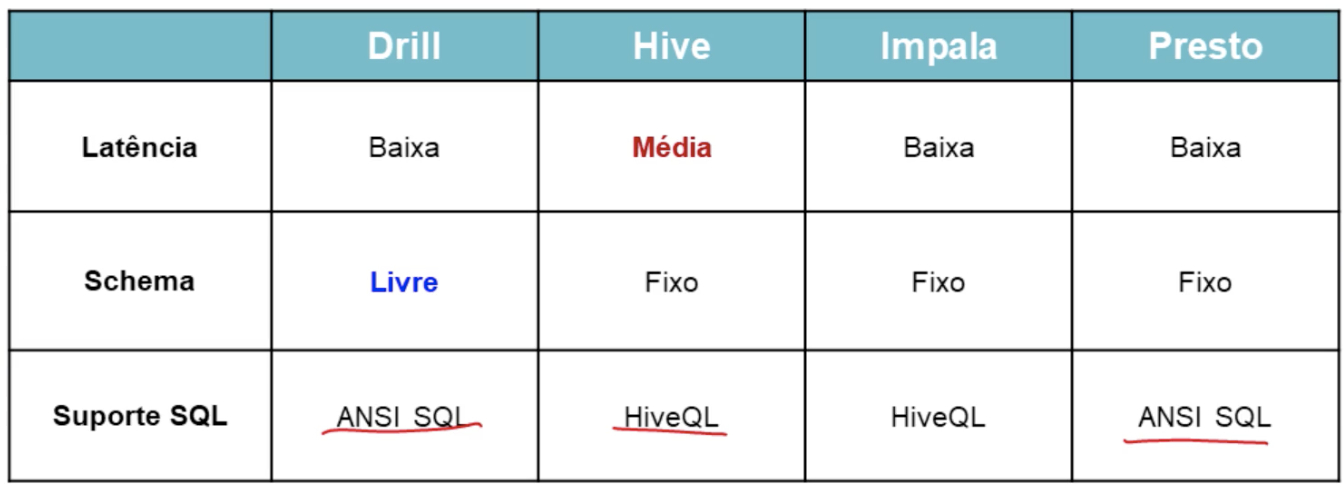

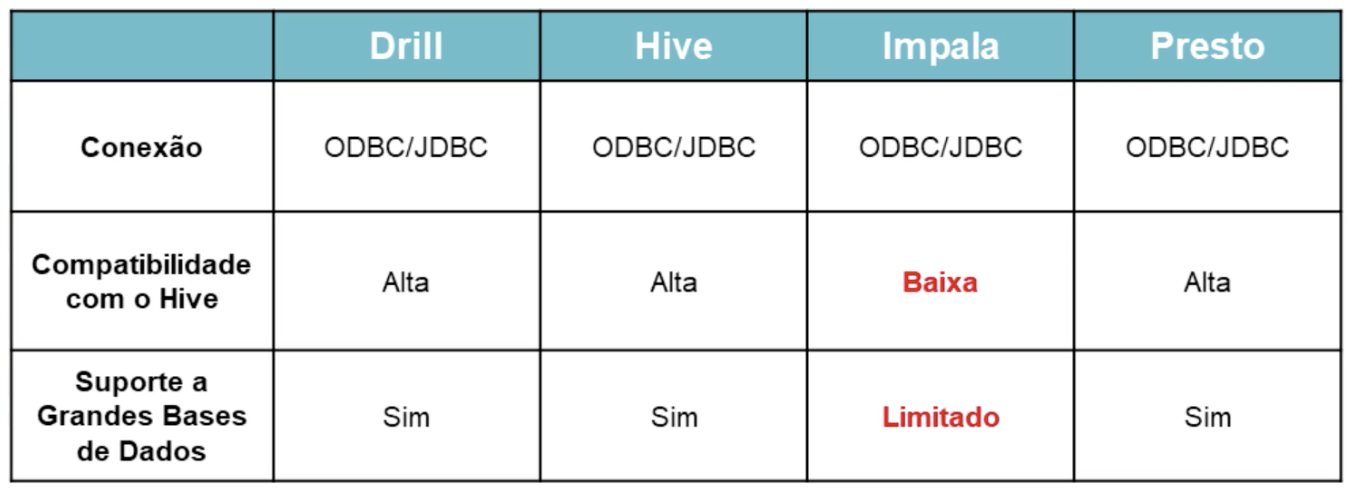

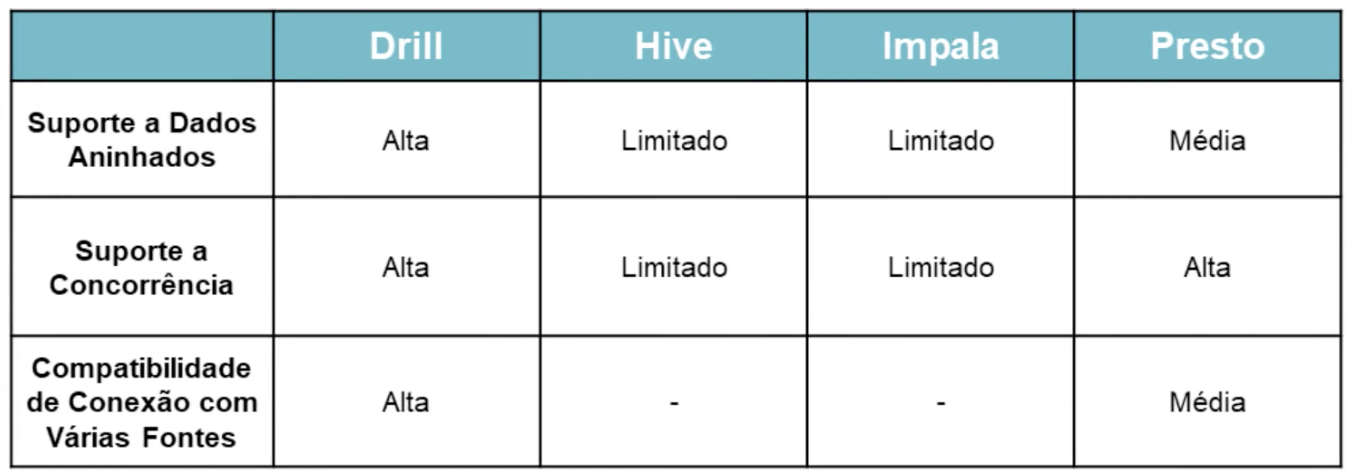

- implementam funcionalidades distintas
- devem ser uteis para o problema que se deseja resovler
- benchmark e uma boa pratica


<h2>Processamento em Batch vs Streaming</h2>

- Batch ou em lotes: computacao de resultados ou todos os dados
- engloba e permite fazer analise profunda de grandes conjuntos de dados
- utilizado na etapa de pre-processamento de diferentes conjuntos de dados <br><br>

- streaming: dados gerados continuamente gerados por milhares de fontes e enviados simultaneamente
- processa arquivos por order/em forma sequencial
- processamento real-time (custo muito alto) ou near-real-time
- exemplo: rede social, log de aplicativos

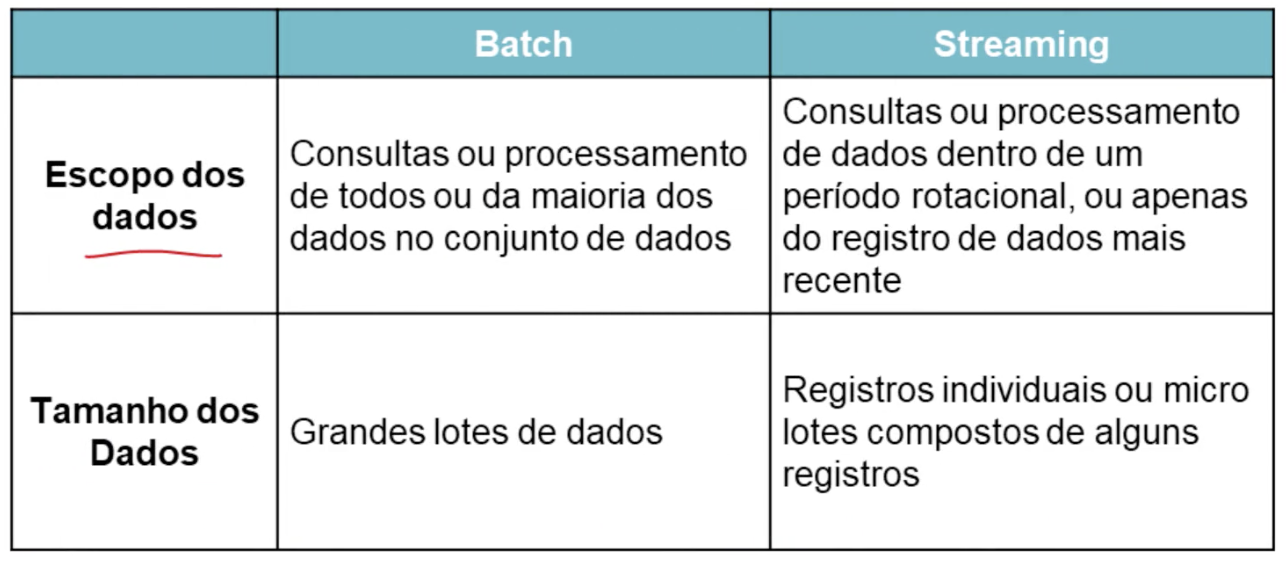

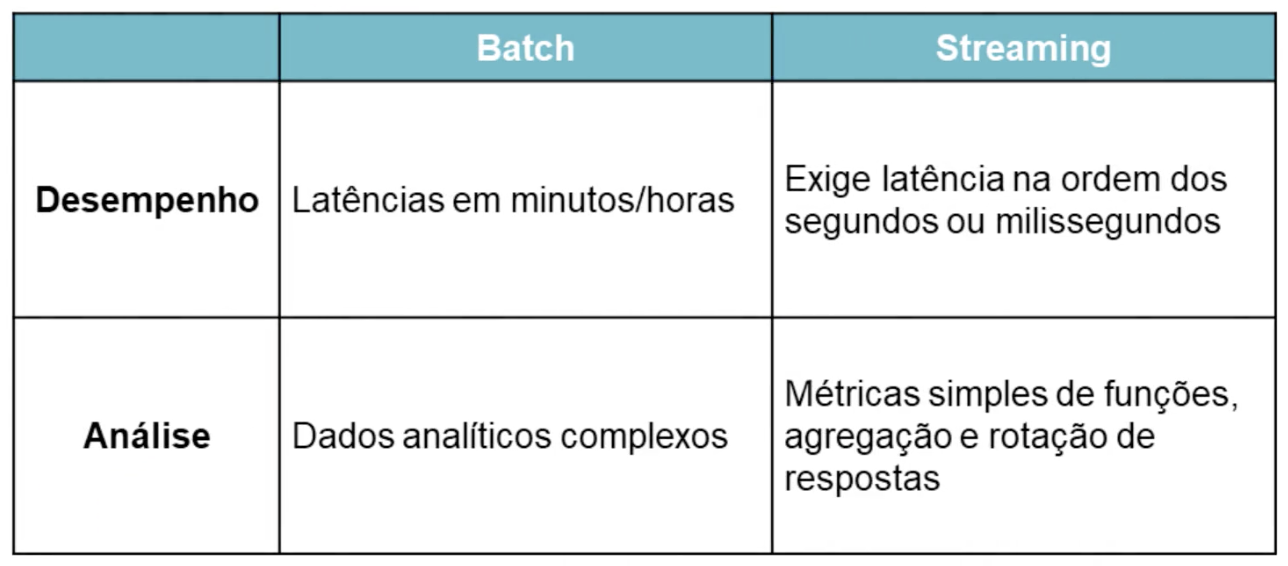

<h2>Escalabilidade</h2>

- arquitetura escalavel: flexivel ao aumento e reducao de demanda
- capaz de aumentar/reduzir capacidade de recursos conforme carga de trabalho muda
- funcional: adicionar componentes com pouco esforco
- geografica: manter performance independente da localidade, expansao concentrada em uma area sem grande esforco
- carga: expandir ou reduzir recursos adaptando carga de entrada/saida
- geracao: novas geracoes de componentes (outros fornecedores)
- scaling up: aumento vertical de recurso;
- scaling out: escalabilidade horizontal / replicar recurso<br>


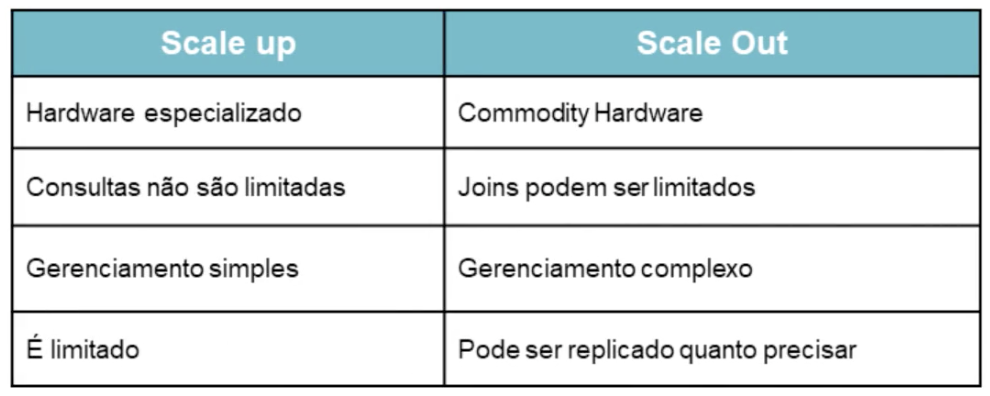


<h2>Computação em Nuvem</h2>

- paradigma preve acesso compartilhado a recursos computacionais sob demanda
    - hardware, rede, armazenamento, software, equipamento de refrigeracao, energiam sistemas de incendio, recurso humado
    - caracteristicas:
    - escaibuicao geografica transparente ao usuario
- Tipologia em nuvem:
- IaaS (infra as a service): componentes basicos, mais alto nivel de flexibilidade; exemplo: maquina virtual
- PaaS (platform as a service): sobe nivel de detalhe; permite concentrar esforco na implantacao e gerenciamento das aplicacoes;
- DaaS (data as a service): servico de banco de dados, google big table, azure data
- SaaS (software as a service): produto completo executado e gerenciado pelo provedor; aplicacoes para o usuario final; exemplo: email<br><br>

- Exemplos:

    - storage: armazenamento de dados; S3, Azure, Google Cloud Storage, Blob
    - computing: numero de maquinas; EC2, Google Compute Engine
    - database: servicos de banco de dados; armazenar dados com capacidade de processamento
    - load balancer: rotas de trafico de entradas e saidas para recursos


<h2>Modelos de Implantação da Nuvem</h2>

- nuvem privada
- implantacao de recursos locais; similar a infra de TI tradicional
- recurso dedicado
<br><br>

- nuvem publica
- implantada na internet
- alocacao sob demanda
- recursos compartilhados
<br><br>

- nuvem hibrida
- estender e aumentar a infraestrutura da organizacao
- mantem recurso totalmente gerenciado localmente
- vantagens:
    - melhor utilizacao do hardware
    - maior receita: novos negocios com alto rendimento
    - menor custo: cobranca realizada sob demanda
- desvantagens:
- dependencia: recursos dependem de terceiros
- seguranca: informacoes sensiveis fora das fronteiras da organizacao
- legislacao: qual legislacao seguir? do fornecedor ou da organizacao?

<h2>Computação em Nuvem - PaaS e DaaS</h2>

- PaaS: evita necessidade de gerenciamento de infraestrutura
- Por que? Acesso a plataforma de processamento de dados
- reduz necessidade de manutencao
- baixo custo
- evita necessidade de instalacao, configuracao de ambientes
- acesso rapido a versoes atualizadas de aplicacoes
- exemplos: AWS (Amazon), Azure HDInsight, Google Cloud Dataproc
- nao fornece ambiente escalavel para processamento de dados
<br><br>

- DaaS: oferece recursos de banco de dados para armazenar informacoes do cliente
- fornece ambiente escalavel exclusivo para armazenamento e processamento de dados
- recurso totalmente gerenciavel
- exemplos: Amazon Redshift, Azure SQL DW, Google Cloud Big Table e BIg Query



<h2>Comunicação API, JDBC e ODBC</h2>

- API
- interface contendo conjunto de funcionalidades de uma aplicacao
- metodo de comunicacao entre varios componentes<br><br>

- JDBC
- tecnologia java para acesso a dados e executar consultas
- eh um tipo de API
- JDBC Driver - permite banco de dados interagirem com componente<br><br>

- ODBC
- desenvolvida pela Microsoft e Simba
- permite construcao de aplicacoes independes de SGBD
- prove acesso a componentes com padrao de comunicacao
- e um tipo de API<br><br>

- comunicacao: formas de acesso que ampliam integracao de recursos
- camada de traducao entre SGBD e aplicacao

<h2>Python, Presto DB e Apache Drill</h2>

- 

<h2>Notas</h2>

1) Quais dos seguintes software são indicadas para processamento de grandes volumes de dados: <b>Hive, Spark, Map Reduce (?)</b>

2) Qual dos comandos abaixo seleciona o curso e a média da mensalidade de todos os alunos matriculados em um curso de engenharia? <b>SELECT CURSO, AVG(MENSALIDADE) AS “MENSALIDADE_MEDIA” FROM ALUNOS WHERE CURSO LIKE “Engenharia%” GROUP BY CURSO;</b>

3) Qual das alternativas abaixo melhor descreve as instruções Union ou Join: <b>Join combina uma ou mais tabelas incluindo novas colunas e linhas no resultado</b>

4) Quais das seguintes definições estão corretamente relacionadas ao armazenamento distribuído e HDFS: <b>Um arquivo salvo no HDFS é armazenado de forma particionada (chunks); HDFS armazena réplicas do dado original; O HDFS faz parte do ecossistema Hadoop V1 e V2</b>

5) O Apache Drill e o Presto DB são capazes de conectar com múltiplas fontes, inclusive outros SGBDs

6) Map, Reduce e Shuffle/Sort são nomes de funções importantes do modelo de programação Map Reduce

7) Pig Latin é a linguagem utilizada pelo Apache Pig

8) Em relação a arquitetura do sistema de armazenamento distribuído Hadoop Distributed File System (HDFS), <b><span style="font-color=red;">não</span></b> podemos afirmar que: <b>Um NameNode nao conhece os DataNodes, apenas os clientes</b>

9) Qual instrução ou cláusula permite escolher a ordem dos atributos a serem recuperados em uma consulta SQL: <b>SELECT FROM</b>

10) Você está trabalhando em um projeto cujo objetivo é inserir de forma eficiente todos os dados de sensores instalados em uma indústria. Qual das opções abaixo indica a forma de armazenamento e a justificativa é mais adequada para esse problema. <b>Armazenar arquivos orientado por linha permite a inserção ao final dos arquivos (append) que é uma operação de inserção mais rápida</b>

11) Qual das alternativas abaixo não é um objetivo relacionado ao modelo de dados SQL. <b>Flexibilizar a carga imposta pela normalização de dados</b>

12) Todas as afirmacoes sao vantagens de se utilizar arquivos no formato colunar exceto rapido para agregacoes

13) Avro e um formato de esquema flexivel orientado por coluna

14) Sobre o Apache Impala e o Presto DB: sao engines SQL para processamento massivo e paralelo de dados

15) As tecnologias apresentadas neste curso têm foco apenas no processamento de dados. Entretanto, outras ferramentas podem ser necessária, por exemplo para visualização dos dados pré processados. Sobre API e seus conceitos, podemos afirmar que (exceto): <b>Normalmente define um método de envio de imagens entre vários componentes de forma complicada</b>

16) A cláusula JOIN permite combinar várias tabelas em uma única consulta. Qual das alternativas abaixo possui a cláusula correta para recuperar um produto cartesiano entre duas tabelas. <b>CROSS JOIN</b>

17) 